<a href="https://colab.research.google.com/github/chiba244qq/colab_sample/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなディープラーニング

## データの読み込み

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:100])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(150, 4)


In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])
print(type(x))

x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)
print(t[:10])
print(type(t))

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
<class 'numpy.ndarray'>
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
<class 'numpy.ndarray'>


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train)
print(type(x_train))
print(t_train)
print(type(x_test))

[[-1.73673948e-01 -1.05276654e+00 -1.46640561e-01 -2.62386821e-01]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [ 1.03800476e+00  5.58610819e-01  1.10378283e+00  1.71209594e+00]
 [ 3.10997534e-01 -1.31979479e-01  6.49083415e-01  7.90670654e-01]
 [-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.18381211e+00]
 [ 6.74501145e-01 -5.92373012e-01  1.04694540e+00  1.18556721e+00]
 [ 1.89829664e-01 -1.97355361e+00  7.05920842e-01  3.95774101e-01]
 [-5.37177559e-01 -1.31979479e-01  4.21733708e-01  3.95774101e-01]
 [ 5.53333275e-01 -3.62176246e-01  1.04694540e+00  7.90670654e-01]
 [-5.25060772e-02 -8.22569778e-01  8.07091462e-02  8.77547895e-04]
 [ 1.89829664e-01 -3.62176246e-01  4.21733708e-01  3.95774101e-01]
 [ 4.32165405e-01 -3.62176246e-01  3.08058854e-01  1.32509732e-01]
 [ 1.89829664e-01 -1.31979479e-01  5.92245988e-01  7.90670654e-01]
 [ 1.28034050e+00  9.82172869e-02  7.62758269e-01  1.44883158e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e

## モデルの構築

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [26]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 0s 1ms/step - loss: 1.0485 - accuracy: 0.4349
Epoch 2/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9193 - accuracy: 0.7267
Epoch 3/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9047 - accuracy: 0.6842
Epoch 4/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7985 - accuracy: 0.8211
Epoch 5/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7382 - accuracy: 0.8151
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7155 - accuracy: 0.8622
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.8393
Epoch 8/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.8497
Epoch 9/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.8335
Epoch 10/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.8551
Epoch 11/30
14/14 [

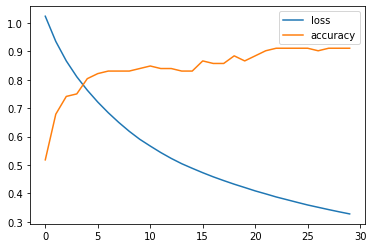

In [31]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

In [33]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.2171 - accuracy: 0.9737
0.2171294093132019 0.9736841917037964


## 予測

In [37]:
model.predict(x_test)

array([[0.07114132, 0.8424667 , 0.086392  ],
       [0.07477119, 0.5311699 , 0.39405897],
       [0.12408025, 0.76172453, 0.11419515],
       [0.9635112 , 0.02700789, 0.00948095],
       [0.03977597, 0.39565778, 0.56456625],
       [0.9457431 , 0.04031113, 0.01394574],
       [0.9536018 , 0.03664368, 0.00975448],
       [0.9591208 , 0.03284756, 0.0080317 ],
       [0.79514974, 0.18209894, 0.02275134],
       [0.99004465, 0.00711384, 0.00284148],
       [0.01798973, 0.11546728, 0.86654294],
       [0.10328607, 0.74810165, 0.14861226],
       [0.9780065 , 0.01721955, 0.00477399],
       [0.03332832, 0.18908738, 0.77758425],
       [0.97862375, 0.016041  , 0.00533526],
       [0.03485383, 0.22529237, 0.7398538 ],
       [0.9681304 , 0.02495752, 0.00691198],
       [0.06459856, 0.74838495, 0.18701644],
       [0.05173274, 0.56011987, 0.3881474 ],
       [0.01723535, 0.15614244, 0.8266222 ],
       [0.00986305, 0.07014561, 0.9199913 ],
       [0.9741417 , 0.02016096, 0.00569728],
       [0.

## 保存

In [38]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')